In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the CNN architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




Epoch 1/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2126 - accuracy: 0.9351 - val_loss: 0.0695 - val_accuracy: 0.9784
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0383 - val_accuracy: 0.9871
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0486 - val_accuracy: 0.9839
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0318 - accuracy: 0.9903 - val_loss: 0.0371 - val_accuracy: 0.9872
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0313 - val_accuracy: 0.9895
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0298 - val_accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0162 - accuracy: 0.9952 - val_loss: 0.0290 - val_accuracy:

1/1 [==============================] - 0s 25ms/step
Predicted lable: 8


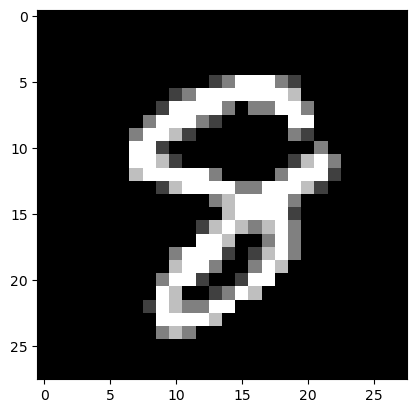

In [8]:
si=x_test[596]
si=np.reshape(si,(1,28,28,1))
pred=model.predict(si)
pred_lable=np.argmax(pred)
print("Predicted lable:",pred_lable)

plt.imshow(si.reshape(28, 28), cmap='gray')
plt.show()
